In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord,Galactocentric,CartesianDifferential
import astropy.units as u
import astropy.coordinates as coord
import h5py
%matplotlib inline

In [210]:
# ra, dec, parallax, G-mag
#data = np.genfromtxt('/Users/nondh/Downloads/full_4kpc-result.csv', skip_header=1,delimiter=',')
#data = np.loadtxt('/Users/nondh/Downloads/full_4kpc-result.csv', skiprows=1,delimiter=',')
#data = np.loadtxt('/Users/nondh/Downloads/sample_50000-result.csv', skiprows=1,delimiter=',')
def read_real_data():
    data1 = np.loadtxt('/Users/nondh/Downloads/full_4kpc-result.csv', skiprows=1,delimiter=',')
    data2 = np.loadtxt('frontside_100pc-result.csv', skiprows=1,delimiter=',')
    data = np.vstack((data1, data2))
    c = coord.ICRS(ra=data[:,2] * u.degree,
                dec=data[:,3] * u.degree,
                distance=(1./data[:,4]) * u.kpc)

    gcentric = c.transform_to(coord.Galactocentric(galcen_v_sun = coord.CartesianDifferential((11.1, -232.24, 7.25)*u.km/u.s)))
    gcentric.representation = 'cylindrical'
    
    n = np.append(np.where((gcentric.phi > 175*u.deg))[0], np.where((gcentric.phi < -175*u.deg))[0])
    gcentric = gcentric[n]
    return gcentric

In [153]:
def pick_subgroup(minmag=)

21632646

In [211]:
gcentric = read_real_data()

In [151]:
c = coord.ICRS(ra=data[:,2] * u.degree,
                dec=data[:,3] * u.degree,
                distance=(1./data[:,4]) * u.kpc)

gcentric = c.transform_to(coord.Galactocentric(galcen_v_sun = coord.CartesianDifferential((11.1, -232.24, 7.25)*u.km/u.s))) 

In [152]:
gcentric.representation = 'cylindrical'
gcentric

<Galactocentric Coordinate (galcen_coord=<ICRS Coordinate: (ra, dec) in deg
    (266.4051, -28.936175)>, galcen_distance=8.3 kpc, galcen_v_sun=(11.1, -232.24, 7.25) km / s, z_sun=27.0 pc, roll=0.0 deg): (rho, phi, z) in (kpc, deg, kpc)
    [(7.73596498,  177.52517055,  0.57371015),
     (7.92056041,  179.96725411, -0.23909014),
     (7.94009813,  179.93356486, -0.23044625), ...,
     (7.40784326,  179.97237185, -0.59840311),
     (7.92591903,  178.39565733,  0.37701095),
     (7.97327681, -179.99772466, -0.20310101)]>

In [209]:
gcentric[np.where((gcentric.phi < -175*u.deg))]

<Galactocentric Coordinate (galcen_coord=<ICRS Coordinate: (ra, dec) in deg
    (266.4051, -28.936175)>, galcen_distance=8.3 kpc, galcen_v_sun=(11.1, -232.24, 7.25) km / s, z_sun=27.0 pc, roll=0.0 deg): (rho, phi, z) in (kpc, deg, kpc)
    [(7.00110693, -179.41186782, -1.32439469),
     (7.71913595, -179.8094146 , -0.581499  ),
     (8.78466438, -177.56685867, -0.23079826), ...,
     (7.53399351, -179.9957313 , -0.51258861),
     (7.64089951, -179.99862079, -0.42453363),
     (7.97327681, -179.99772466, -0.20310101)]>

In [172]:
np.where((gcentric.phi < -175*u.deg))[0]

8290458

# Read in the data from mock catalogue

In [173]:
f = h5py.File('lsr-2-rslice-0.m12i-res7100-md-sliced-gcat-dr2.hdf5', 'r')

In [174]:
# List all groups
f.keys()

[u'A0',
 u'a_g_bp_val',
 u'a_g_rp_val',
 u'a_g_val',
 u'age',
 u'alpha',
 u'b',
 u'b_true',
 u'bp_g',
 u'bp_g_int',
 u'bp_g_true',
 u'bp_rp',
 u'bp_rp_int',
 u'bp_rp_true',
 u'calcium',
 u'carbon',
 u'dec',
 u'dec_error',
 u'dec_true',
 u'dhel_true',
 u'dmod_true',
 u'e_bp_min_rp_val',
 u'ebv',
 u'feh',
 u'g_rp',
 u'g_rp_int',
 u'g_rp_true',
 u'helium',
 u'l',
 u'l_true',
 u'logg',
 u'lognh',
 u'lum_val',
 u'mact',
 u'magnesium',
 u'mini',
 u'mtip',
 u'neon',
 u'nitrogen',
 u'oxygen',
 u'parallax',
 u'parallax_error',
 u'parallax_over_error',
 u'parallax_true',
 u'parentid',
 u'partid',
 u'phot_bp_mean_mag',
 u'phot_bp_mean_mag_error',
 u'phot_bp_mean_mag_int',
 u'phot_bp_mean_mag_true',
 u'phot_g_mean_mag',
 u'phot_g_mean_mag_error',
 u'phot_g_mean_mag_int',
 u'phot_g_mean_mag_true',
 u'phot_rp_mean_mag',
 u'phot_rp_mean_mag_error',
 u'phot_rp_mean_mag_int',
 u'phot_rp_mean_mag_true',
 u'pmb_true',
 u'pmdec',
 u'pmdec_error',
 u'pmdec_true',
 u'pml_true',
 u'pmra',
 u'pmra_error',
 u'

In [26]:
ii = np.where((f['parallax'][:]>0.25) & (f['parallax_over_error'][:] > 10))[0]

In [38]:
f['parallax'][:][ii]

array([0.42745022, 0.46285138, 0.46899979, ..., 0.6278187 , 0.49750184,
       0.68114689])

In [39]:
mock_ra = f['ra'][:][ii]
mock_dec = f['dec'][:][ii]
mock_parallax = f['parallax'][:][ii]
mock_bprp = f['bp_rp'][:][ii]
mock_bprp_int = f['bp_rp_int'][:][ii]

In [31]:
c_mock = coord.ICRS(ra=mock_ra * u.degree,
                dec=mock_dec * u.degree,
                distance=(1./mock_parallax) * u.kpc)

gcentric_mock = c.transform_to(coord.Galactocentric(galcen_v_sun = coord.CartesianDifferential((11.1, -232.24, 7.25)*u.km/u.s))) 

In [32]:
gcentric_mock.representation = 'cylindrical'
gcentric_mock

<Galactocentric Coordinate (galcen_coord=<ICRS Coordinate: (ra, dec) in deg
    (266.4051, -28.936175)>, galcen_distance=8.3 kpc, galcen_v_sun=(11.1, -232.24, 7.25) km / s, z_sun=27.0 pc, roll=0.0 deg): (rho, phi, z) in (kpc, deg, kpc)
    [(6.98671051, -148.47173225,  0.34411794),
     (7.52053847, -171.8939422 , -0.33744767),
     (8.83035248,  166.30244513, -0.04274612), ...,
     (8.22858042, -172.33932109,  0.60478393),
     (6.80723819, -174.78165177, -0.23304994),
     (8.87193722,  179.41872878,  0.04906768)]>

# r-z space binning
### 0.1x0.05 kpc

## Real Gaia

In [61]:
# assuming dat's columns are in #r, theta, z
def get_bin_edges():
    r_edges = np.array(range(40,131,1))/10.
    r_edges = r_edges*u.kpc
    z_edges = np.array(range(-250,255,5))/100.
    z_edges = z_edges*u.kpc
    return r_edges, z_edges
    

In [109]:
rr, zz = get_bin_edges()
rr

<Quantity [ 4. ,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,  4.7,  4.8,  4.9,
            5. ,  5.1,  5.2,  5.3,  5.4,  5.5,  5.6,  5.7,  5.8,  5.9,
            6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,  6.7,  6.8,  6.9,
            7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,  7.8,  7.9,
            8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,  8.9,
            9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
           10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
           11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9,
           12. , 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9,
           13. ] kpc>

In [182]:
def pad_withNan(p):
    ii,jj = np.where(p < 10)
    for i, j in zip(ii, jj):
        p[i,j] = np.nan
    return p

In [183]:
def get_hist(gcentric, rr, zz):
    H, e1, e2 = np.histogram2d(gcentric.rho, gcentric.z, bins=(rr, zz))
    H = H.T
    H_new = pad_withNan(H)
    
    fig = plt.figure(figsize=((12,8)))
    ax = fig.add_subplot(1,1,1)
    X, Y = np.meshgrid(e1, e2)
    im = ax.pcolormesh(X, Y, H_new, cmap='jet')
    fig.colorbar(im, ax =ax)
    #return H, e1, e2

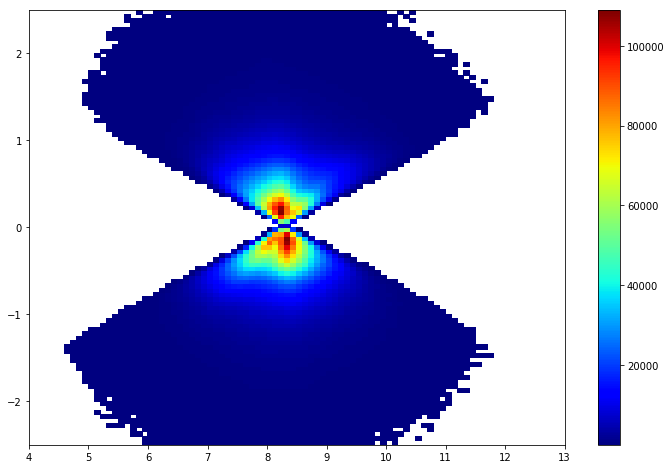

In [184]:
get_hist(gcentric, rr, zz)

## Mock Gaia

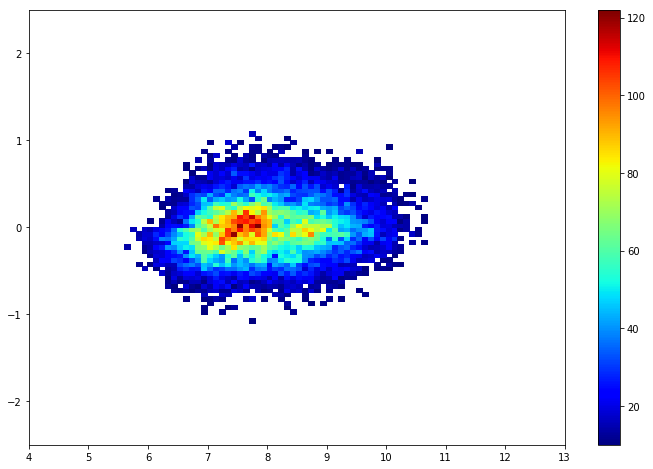

In [185]:
get_hist(gcentric_mock, rr, zz)

In [181]:
gcentric_mock

<Galactocentric Coordinate (galcen_coord=<ICRS Coordinate: (ra, dec) in deg
    (266.4051, -28.936175)>, galcen_distance=8.3 kpc, galcen_v_sun=(11.1, -232.24, 7.25) km / s, z_sun=27.0 pc, roll=0.0 deg): (rho, phi, z) in (kpc, deg, kpc)
    [(6.98671051, -148.47173225,  0.34411794),
     (7.52053847, -171.8939422 , -0.33744767),
     (8.83035248,  166.30244513, -0.04274612), ...,
     (8.22858042, -172.33932109,  0.60478393),
     (6.80723819, -174.78165177, -0.23304994),
     (8.87193722,  179.41872878,  0.04906768)]>

In [41]:
import emcee

In [59]:
r_edges

<Quantity [ 4. ,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,  4.7,  4.8,  4.9,
            5. ,  5.1,  5.2,  5.3,  5.4,  5.5,  5.6,  5.7,  5.8,  5.9,
            6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,  6.7,  6.8,  6.9,
            7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,  7.8,  7.9,
            8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,  8.9,
            9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
           10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
           11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9,
           12. , 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9,
           13. ] kpc>

In [60]:
z_edges

<Quantity [-2.5 , -2.45, -2.4 , -2.35, -2.3 , -2.25, -2.2 , -2.15, -2.1 ,
           -2.05, -2.  , -1.95, -1.9 , -1.85, -1.8 , -1.75, -1.7 , -1.65,
           -1.6 , -1.55, -1.5 , -1.45, -1.4 , -1.35, -1.3 , -1.25, -1.2 ,
           -1.15, -1.1 , -1.05, -1.  , -0.95, -0.9 , -0.85, -0.8 , -0.75,
           -0.7 , -0.65, -0.6 , -0.55, -0.5 , -0.45, -0.4 , -0.35, -0.3 ,
           -0.25, -0.2 , -0.15, -0.1 , -0.05,  0.  ,  0.05,  0.1 ,  0.15,
            0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,  0.45,  0.5 ,  0.55,  0.6 ,
            0.65,  0.7 ,  0.75,  0.8 ,  0.85,  0.9 ,  0.95,  1.  ,  1.05,
            1.1 ,  1.15,  1.2 ,  1.25,  1.3 ,  1.35,  1.4 ,  1.45,  1.5 ,
            1.55,  1.6 ,  1.65,  1.7 ,  1.75,  1.8 ,  1.85,  1.9 ,  1.95,
            2.  ,  2.05,  2.1 ,  2.15,  2.2 ,  2.25,  2.3 ,  2.35,  2.4 ,
            2.45] kpc>

In [55]:
r_edges = np.array(range(40,131,1))/10.

In [56]:
r_edges

array([ 4. ,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,
        5.1,  5.2,  5.3,  5.4,  5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,
        6.2,  6.3,  6.4,  6.5,  6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,
        7.3,  7.4,  7.5,  7.6,  7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,
        8.4,  8.5,  8.6,  8.7,  8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,
        9.5,  9.6,  9.7,  9.8,  9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5,
       10.6, 10.7, 10.8, 10.9, 11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6,
       11.7, 11.8, 11.9, 12. , 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7,
       12.8, 12.9, 13. ])